In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
# Get the training data 
df1 = pd.read_csv(r"C:\Users\dell\Desktop\linearX.csv")
df2 = pd.read_csv(r"C:\Users\dell\Desktop\linearY.csv")
print(df1.shape)  #shape gives (row,column)

df1 = df1.values
df2 = df2.values

x = df1.reshape((-1,))
y = df2.reshape((-1,))
print(x.shape,y.shape)
print (x)

(99, 1)
(99,) (99,)
[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


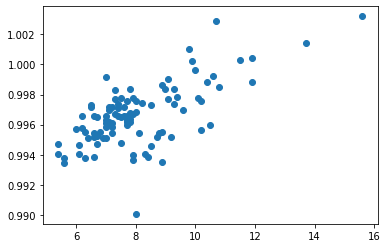

In [15]:
# Gradient Descent Algorithm
# Data preprocessing
import matplotlib.pyplot as plt
plt.scatter(x,y)
x = (x-x.mean())/x.std()
plt.show()

In [25]:
def hypothesis (x,theta):
     return theta[0] + theta[1]*x
    
def error(x,y,theta):
    error =0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        error += (hx-y[i])**2
    return error


def gradient(x,y,theta):
    grad = np.zeros((2,))
    for i in range (x.shape[0]):
        hx = hypothesis (x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i]*x[i])
    
    return grad
        
            

In [26]:
def gradientDescent (x,y,learning_rate=0.001):
    theta = np.array([-2.0,0.0])
    max_iterations =100
    itr =0
    error_list =[]
    theta_list =[]
    while(itr <= max_iterations):
        grad = gradient(x,y,theta)
        err = error (x,y,theta)
        error_list.append(err)
        theta_list.append(theta)
        theta[0] -=learning_rate*grad[0]
        theta[1] -=learning_rate*grad[1]
        itr +=1
    
    return theta ,error_list ,theta_list

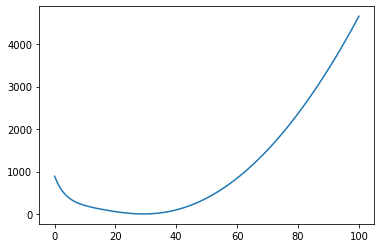

[ 0.996554   -6.95521274]


In [28]:
final_theta,error_list ,theta_list = gradientDescent(x,y)
plt.plot(error_list)
plt.show()
print(final_theta)

In [29]:
# plot lines for testing data 
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


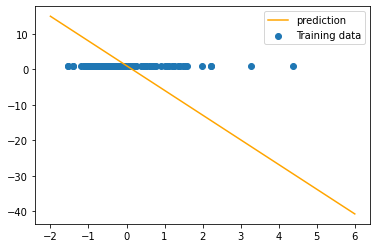

In [30]:
plt.scatter(x,y,label = 'Training data')
plt.plot (xtest,hypothesis(xtest,final_theta),color ='orange',label ='prediction')
plt.legend()
plt.show()